In [ ]:
import torch
import matplotlib.pyplot as plt

In [ ]:
def initialize(segment):
  x_vec=torch.linspace(-torch.pi, torch.pi, segment)
  p_vec=torch.randn(segment)*0.1
  p_vec.requires_grad=True
  return p_vec

In [ ]:
def exp_and_coefficient(p_vec):
  exp_p = torch.exp(1j * p_vec)
  coeff = torch.fft.fft(exp_p) / len(exp_p)

  powers_of_minus_one = torch.pow(-1, torch.arange(len(p_vec)))
  corrected_coeff = coeff * powers_of_minus_one

  return corrected_coeff

In [ ]:
def forward(p_vec: torch.tensor, alpha=0.5):
  coefficient=exp_and_coefficient(p_vec)

  total_energy=1 # phase domian magnitude is all 1, energy conserve
  nega1_energy=torch.abs(coefficient[-1])**2
  posi1_energy=torch.abs(coefficient[1])**2

  energy_efficiency=(nega1_energy+posi1_energy)/total_energy

  loss=(alpha)*(1-energy_efficiency)+(1-alpha)*torch.abs(nega1_energy-posi1_energy)

  return loss

In [ ]:
def train(epoches, initial_learning_rate, alpha=0.5, segment=1000):
    p_vec = initialize(segment)
    learning_rate = initial_learning_rate
    baseline_loss = float('inf')  # Initialize with a very high value for the first comparison
    loss_values = []  # To store loss values for plotting
    lr_change_epochs = []  # To store epochs where learning rate changes
    lr_changes = []  # To store learning rate changes for legend

    for epoch in range(epoches):
        loss = forward(p_vec, alpha)
        loss_values.append(loss.item())

        # Check if loss has reduced by 20% compared to the baseline loss
        if loss.item() <= 0.8 * baseline_loss:
            old_lr = learning_rate
            learning_rate /= 2
            lr_change_epochs.append(epoch)
            lr_changes.append((old_lr, learning_rate))
            baseline_loss = loss.item()  # Reset the baseline loss
            print('Learning rate changed at Epoch:', epoch, 'from', old_lr, 'to', learning_rate)

        loss.backward()
        with torch.no_grad():
            p_vec -= learning_rate * p_vec.grad
            p_vec.grad.zero_()

        print('Epoch:', epoch, 'Loss:', loss.item())

    # Plotting
    plt.plot(loss_values, label='Loss')
    for i, epoch in enumerate(lr_change_epochs):
        plt.axvline(x=epoch, color='r', linestyle='--', label=f'LR Change at Epoch {epoch}: {lr_changes[i][0]} -> {lr_changes[i][1]}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss vs. Epochs')
    plt.legend()
    plt.show()

    return p_vec


In [ ]:
def visualize(p_vec,segment=1000):
  coefficient = exp_and_coefficient(p_vec)

  plt.figure(figsize=(36, 6))
  plt.subplot(1, 3, 1)
  plt.stem(p_vec.detach().numpy())
  plt.title("phase function")

  plt.subplot(1, 3, 2)
  plt.stem(torch.exp(1j*coefficient).detach().numpy())
  plt.title("transmittance function")

  plt.subplot(1, 3, 3)
  plt.stem(torch.abs(coefficient).detach().numpy())
  plt.title("Fouier coefficients function")



  print("Some Fourier Coefficients:")
  coeff_indices = [0, -1, 1, -2, 2, -3, 3, -4, 4]
  for index in coeff_indices:
    coeff_value = coefficient[index]
    magnitude = torch.abs(coeff_value).detach().item()
    magnitude_squared = magnitude ** 2
    print(f"coefficient {index}: Value: {coeff_value}, Magnitude: {magnitude}, Magnitude Squared: {magnitude_squared}")
  print("\n")

  print("Calculate Energy Efficiency:")
  print("Energy Efficiency =",(abs(coefficient[1])**2).item()+(abs(coefficient[-1])**2).item())
  print("\n")

  print("Test Energy Conservation:")
  frequency_energy = torch.sum(torch.abs(coefficient) ** 2).item()
  print("energy calculated by frequncy domain", frequency_energy)
  print("energy calculated by space domain should be 1")

流式输出内容被截断，只能显示最后 5000 行内容。
Epoch: 25000 Loss: 0.09596836566925049
Epoch: 25001 Loss: 0.09600600600242615
Epoch: 25002 Loss: 0.09596812725067139
Epoch: 25003 Loss: 0.09600600600242615
Epoch: 25004 Loss: 0.09596788883209229
Epoch: 25005 Loss: 0.09600593149662018
Epoch: 25006 Loss: 0.09596759080886841
Epoch: 25007 Loss: 0.09600602090358734
Epoch: 25008 Loss: 0.0959673523902893
Epoch: 25009 Loss: 0.09600596129894257
Epoch: 25010 Loss: 0.09596705436706543
Epoch: 25011 Loss: 0.09600600600242615
Epoch: 25012 Loss: 0.09596683084964752
Epoch: 25013 Loss: 0.09600599110126495
Epoch: 25014 Loss: 0.09596659243106842
Epoch: 25015 Loss: 0.09600599110126495
Epoch: 25016 Loss: 0.09596632421016693
Epoch: 25017 Loss: 0.09600600600242615
Epoch: 25018 Loss: 0.09596599638462067
Epoch: 25019 Loss: 0.09600600600242615
Epoch: 25020 Loss: 0.09596575796604156
Epoch: 25021 Loss: 0.09600594639778137
Epoch: 25022 Loss: 0.09596547484397888
Epoch: 25023 Loss: 0.09600594639778137
Epoch: 25024 Loss: 0.09596523642539978

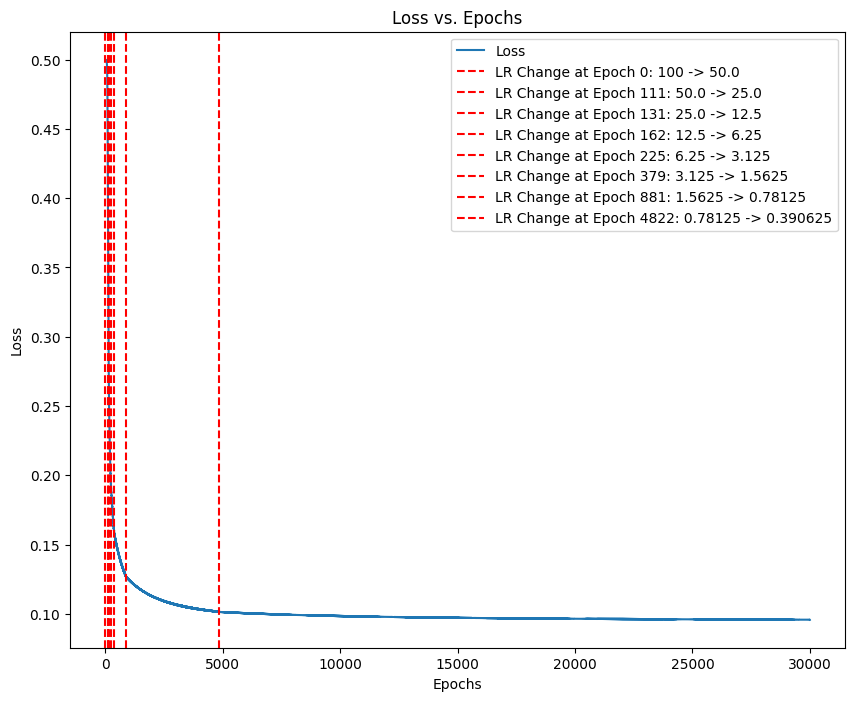

In [ ]:
p_vec = train(30000,100,0.5,1000)

Some Fourier Coefficients:
coefficient 0: Value: (0.05075257644057274-0.00016619790403638035j), Magnitude: 0.050752848386764526, Magnitude Squared: 0.0025758516193699066
coefficient -1: Value: (0.1413106620311737+0.6201794743537903j), Magnitude: 0.6360749006271362, Magnitude Squared: 0.40459127920782123
coefficient 1: Value: (-0.14243778586387634+0.6196571588516235j), Magnitude: 0.6358172297477722, Magnitude Squared: 0.40426354964413136
coefficient -2: Value: (-0.04497627168893814+0.022016726434230804j), Magnitude: 0.0500759556889534, Magnitude Squared: 0.0025076013381620244
coefficient 2: Value: (-0.04515630379319191-0.021735554561018944j), Magnitude: 0.05011512711644173, Magnitude Squared: 0.002511525965897113
coefficient -3: Value: (-0.1313135325908661-0.16433581709861755j), Magnitude: 0.21035566926002502, Magnitude Squared: 0.04424950758983304
coefficient 3: Value: (0.13136889040470123-0.16388645768165588j), Magnitude: 0.210039421916008, Magnitude Squared: 0.04411655875881082
coeff

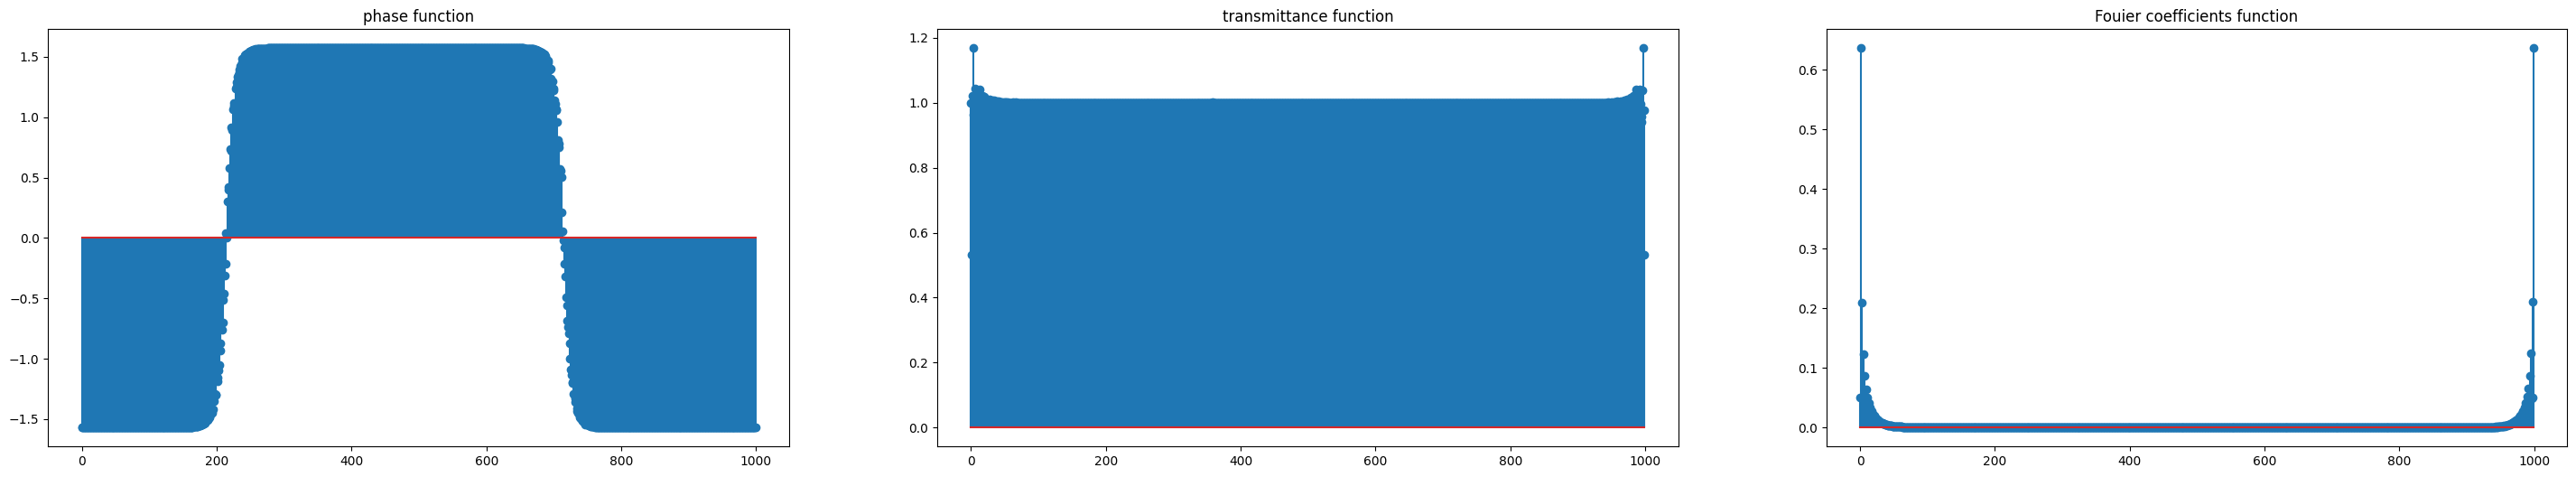

In [ ]:
visualize(p_vec)